# Entrenamiento de modelos

El objetivo de este notebook es entrenar varios modelos de manera "rápida".

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import resnet_v2, mobilenet_v2, densenet, vgg16, vgg19
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [41]:
MODEL = 'VGG19'            # Modelo que se va a entrenar 
EPOCHS = 70               
LEARNING_RATE = 1e-5

In [42]:
def get_pretrained_model(trainable = False):
    if MODEL == 'ResNet50V2':
        pretrained = resnet_v2.ResNet50V2(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    elif MODEL == 'ResNet101V2':
        pretrained = resnet_v2.ResNet101V2(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    elif MODEL == 'ResNet152V2':
        pretrained = resnet_v2.ResNet152V2(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    elif MODEL == 'DenseNet121':
        pretrained = densenet.DenseNet121(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    elif MODEL == 'DenseNet169':
        pretrained = densenet.DenseNet169(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    elif MODEL == 'DenseNet201':
        pretrained = densenet.DenseNet201(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    elif MODEL == 'VGG16':
        pretrained = vgg16.VGG16(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    elif MODEL == 'VGG19':
        pretrained = vgg19.VGG19(
            include_top= False,
            weights= "imagenet",
            input_shape= (224, 224, 3),
            classes= 8
        )
    else:
        raise Exception

    pretrained.trainable = trainable

    inputs = tf.keras.Input(shape=(224, 224, 3))

    x = resnet_v2.preprocess_input(inputs)

    x = data_augmentation(x)
    x = pretrained(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.35)(x)
    
    outputs = Dense(8, activation= 'softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    return model

In [43]:
def plot_history(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = history.epoch

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    print(np.max(val_acc))

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/ito/miUpna/Informatica/3/3.1/Vision/3_UPNA_source_code/CoinClassifier/img/trainPreprocesado', 
    batch_size= 32, image_size= (224,224), 
    shuffle= True, seed= 4321, label_mode= 'categorical',
    validation_split= 0.25, subset='training'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/ito/miUpna/Informatica/3/3.1/Vision/3_UPNA_source_code/CoinClassifier/img/trainPreprocesado', 
    batch_size= 32, image_size= (224,224), label_mode= 'categorical',
    shuffle= True, seed= 4321, 
    validation_split= 0.25, subset='validation'
)

Found 2671 files belonging to 8 classes.
Using 2004 files for training.
Found 2671 files belonging to 8 classes.
Using 667 files for validation.


In [45]:
train_description = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}

for imgs, labels in train_ds.as_numpy_iterator():
    for label in labels:
        label = np.argmax(label)
        train_description[int(label)] += 1

print(train_description, "\n")
for key in train_description:
    print(f"{key}: {np.round(train_description[key]/2004, 2)}", end= ", ")

{0: 355, 1: 190, 2: 270, 3: 275, 4: 161, 5: 145, 6: 197, 7: 411} 

0: 0.18, 1: 0.09, 2: 0.13, 3: 0.14, 4: 0.08, 5: 0.07, 6: 0.1, 7: 0.21, 

In [46]:
val_description = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}

for imgs, labels in val_ds.as_numpy_iterator():
    for label in labels:
        label = np.argmax(label)
        val_description[int(label)] += 1

print(val_description, "\n")

for key in val_description:
    print(f"{key}: {np.round(val_description[key]/667,2)}", end= ", ")

{0: 138, 1: 61, 2: 90, 3: 72, 4: 62, 5: 43, 6: 69, 7: 132} 

0: 0.21, 1: 0.09, 2: 0.13, 3: 0.11, 4: 0.09, 5: 0.06, 6: 0.1, 7: 0.2, 

In [47]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.RandomRotation(1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

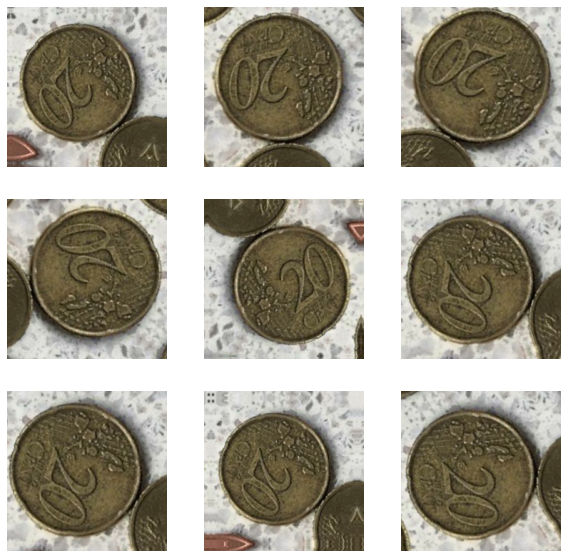

In [48]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(10):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
model = get_pretrained_model()
model.summary()

In [ ]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics= ['accuracy'],
)

history = model.fit(
  train_ds,
  validation_data= val_ds,
  epochs= 20,
  workers= -1,
)

In [ ]:
plot_history(history)

In [ ]:
callbacks = [
    ModelCheckpoint(f"{MODEL}.hdf5", monitor= 'val_loss', verbose= 1,
        save_best_only=True, save_weights_only= True, mode= 'auto', period= 1),
    ReduceLROnPlateau(factor= 0.5, patience= 3, min_lr= 1e-10, verbose= 1),
    #EarlyStopping(patience= 10),
]

In [ ]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(LEARNING_RATE),
    loss = 'categorical_crossentropy',
    metrics= ['accuracy'],
)

history = model.fit(
    train_ds,
    validation_data= val_ds,
    epochs= EPOCHS,
    workers= -1,
    callbacks= callbacks,
)

In [ ]:
plot_history(history)

In [ ]:
model.load_weights(f'{MODEL}.hdf5')
model.evaluate(val_ds)

In [ ]:
val_data = {'true': [], 'predicted': []}
error_imgs = []

for images, labels in val_ds.as_numpy_iterator():
    val_predictions = model.predict(images)
    val_predictions = np.argmax(val_predictions, axis= 1)
    
    for index, label in enumerate(labels):
        label = np.argmax(label)
        val_data['true'].append(label)
        val_data['predicted'].append(val_predictions[index])
        if label != val_predictions[index]:
            error_imgs.append((images[index], label, val_predictions[index]))

val_data = pd.DataFrame(val_data)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
y_true, y_pred = val_data['true'].values , val_data['predicted'].values

target_names = ['10c', '1c', '1e', '20c', '2c', '2e', '50c', '5c']

conf_mx = confusion_matrix(y_true , y_pred)

report = classification_report(y_true, y_pred, target_names= target_names)

ConfusionMatrixDisplay(conf_mx, display_labels= target_names).plot(cmap= 'cividis')

print("f score por clases: \n\n",report)

In [ ]:
for img, true, pred in tqdm(error_imgs):
    plt.figure()
    plt.title(f"{true} {pred}")
    plt.imshow(img.astype(np.uint8))